<a href="https://colab.research.google.com/github/bi0pce/Face-Emotion-and-Speech-Emotion-Recognition-System-/blob/main/face_emotion_recognition_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/project_DL/train'
val_dir = '/content/drive/MyDrive/project_DL/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 1400 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        #steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator)
        #validation_steps=7178 // 64)

<ipython-input-5-5ab33bc8a19f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
22/22 [==============================] - 406s 18s/step - loss: 1.9370 - accuracy: 0.1829 - val_loss: 1.9165 - val_accuracy: 0.1371
Epoch 2/50
22/22 [==============================] - 101s 5s/step - loss: 1.7692 - accuracy: 0.2564 - val_loss: 1.8045 - val_accuracy: 0.2771
Epoch 3/50
22/22 [==============================] - 103s 5s/step - loss: 1.5775 - accuracy: 0.3764 - val_loss: 1.7404 - val_accuracy: 0.2971
Epoch 4/50
22/22 [==============================] - 100s 5s/step - loss: 1.3494 - accuracy: 0.4971 - val_loss: 1.5380 - val_accuracy: 0.4743
Epoch 5/50
22/22 [==============================] - 102s 5s/step - loss: 1.2033 - accuracy: 0.5393 - val_loss: 1.3897 - val_accuracy: 0.5143
Epoch 6/50
22/22 [==============================] - 100s 5s/step - loss: 1.0404 - accuracy: 0.5979 - val_loss: 1.2739 - val_accuracy: 0.5571
Epoch 7/50
22/22 [==============================] - 105s 5s/step - loss: 0.9943 - accuracy: 0.6243 - val_loss: 1.0987 - val_accuracy: 0.6257
Epoch 8/50
2

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
emotion_model.save('new24_model.h5')

In [ ]:
import matplotlib.pyplot as plt

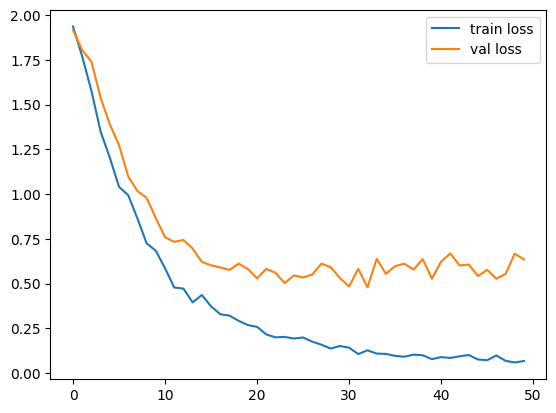

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(emotion_model_info.history['loss'], label='train loss')
plt.plot(emotion_model_info.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

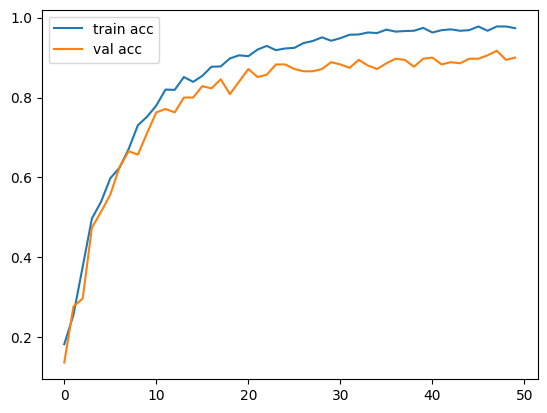

<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(emotion_model_info.history['accuracy'], label='train acc')
plt.plot(emotion_model_info.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')